In [1]:
#Set up google colab working environment
%cd ~/../content
%rm -rf Colombian-peso-counterfeit-detection
!git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git 
%cd /content/Colombian-peso-counterfeit-detection/Code 

/content
Cloning into 'Colombian-peso-counterfeit-detection'...
remote: Enumerating objects: 42305, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 42305 (delta 89), reused 39 (delta 26), pack-reused 42174
Receiving objects: 100% (42305/42305), 884.43 MiB | 18.31 MiB/s, done.
Resolving deltas: 100% (1248/1248), done.
Updating files: 100% (103997/103997), done.
/content/Colombian-peso-counterfeit-detection/Code


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import common_functions as cf
from keras import models
from keras import layers

# ANN

## Load Data

In [3]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData(path = "../Data/Augmented/", batch_size=12)


Found 24958 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.


## Run model

In [4]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)
#Define model
model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(480, 640, 3)),
            tf.keras.layers.Rescaling(1./255),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256),
            tf.keras.layers.Dense(128),
            tf.keras.layers.Dense(128),
            tf.keras.layers.Dense(
                  units = 13,
                activation = "softmax"
          )])
        
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


In [5]:
#Fit model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=5)

Epoch 1/5
2080/2080 [==============================] - 178s 83ms/step - loss: 74.7259 - accuracy: 0.3645 - val_loss: 24.2719 - val_accuracy: 0.4280
Epoch 2/5
2080/2080 [==============================] - 179s 86ms/step - loss: 21.0681 - accuracy: 0.4865 - val_loss: 37.7129 - val_accuracy: 0.4119
Epoch 3/5
2080/2080 [==============================] - 177s 85ms/step - loss: 13.6304 - accuracy: 0.5324 - val_loss: 35.2997 - val_accuracy: 0.3118
Epoch 4/5
2080/2080 [==============================] - 174s 83ms/step - loss: 4.9478 - accuracy: 0.6418 - val_loss: 1.9545 - val_accuracy: 0.7153
Epoch 5/5
2080/2080 [==============================] - 177s 85ms/step - loss: 16.9616 - accuracy: 0.6523 - val_loss: 1.4762 - val_accuracy: 0.7498


# Model evaluation metrics

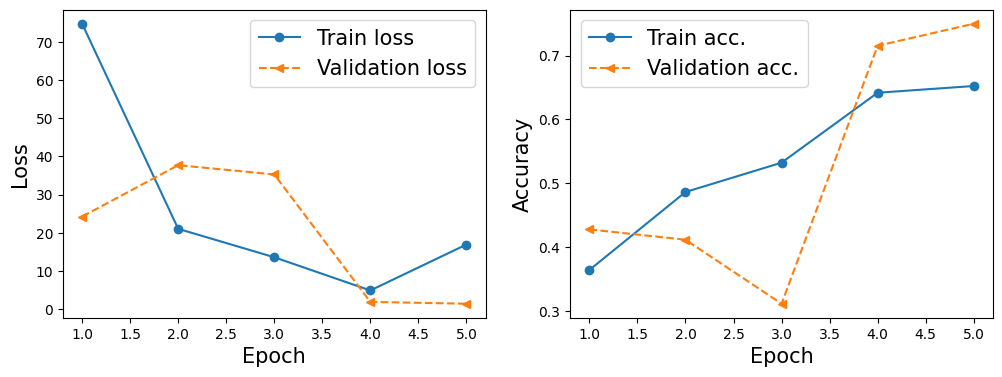

694/694 - 36s - loss: 1.3966 - accuracy: 0.7556 - 36s/epoch - 51ms/step
Test loss: 1.3966373205184937 | Test accuracy: 0.7556490302085876


(0.6523359417915344, 0.7497596144676208, 0.7556490302085876)

In [6]:
cf.EvaluateModel(model, test_ds, history)

Macro averaged precision score: 0.7556490384615384
Macro averaged recall score: 0.794612382442321
Macro averaged F1 score: 0.748875065285531


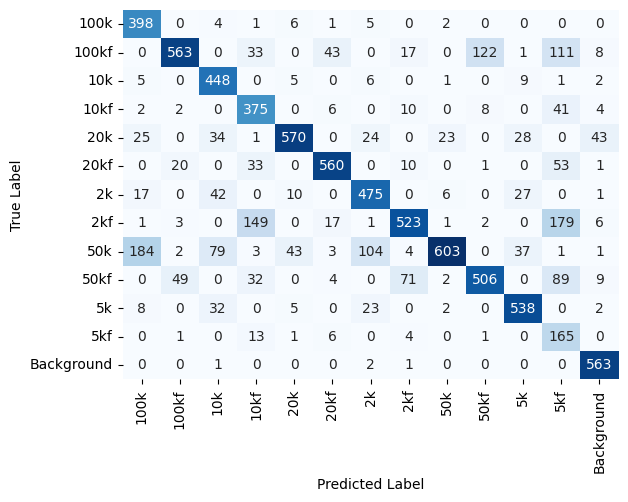

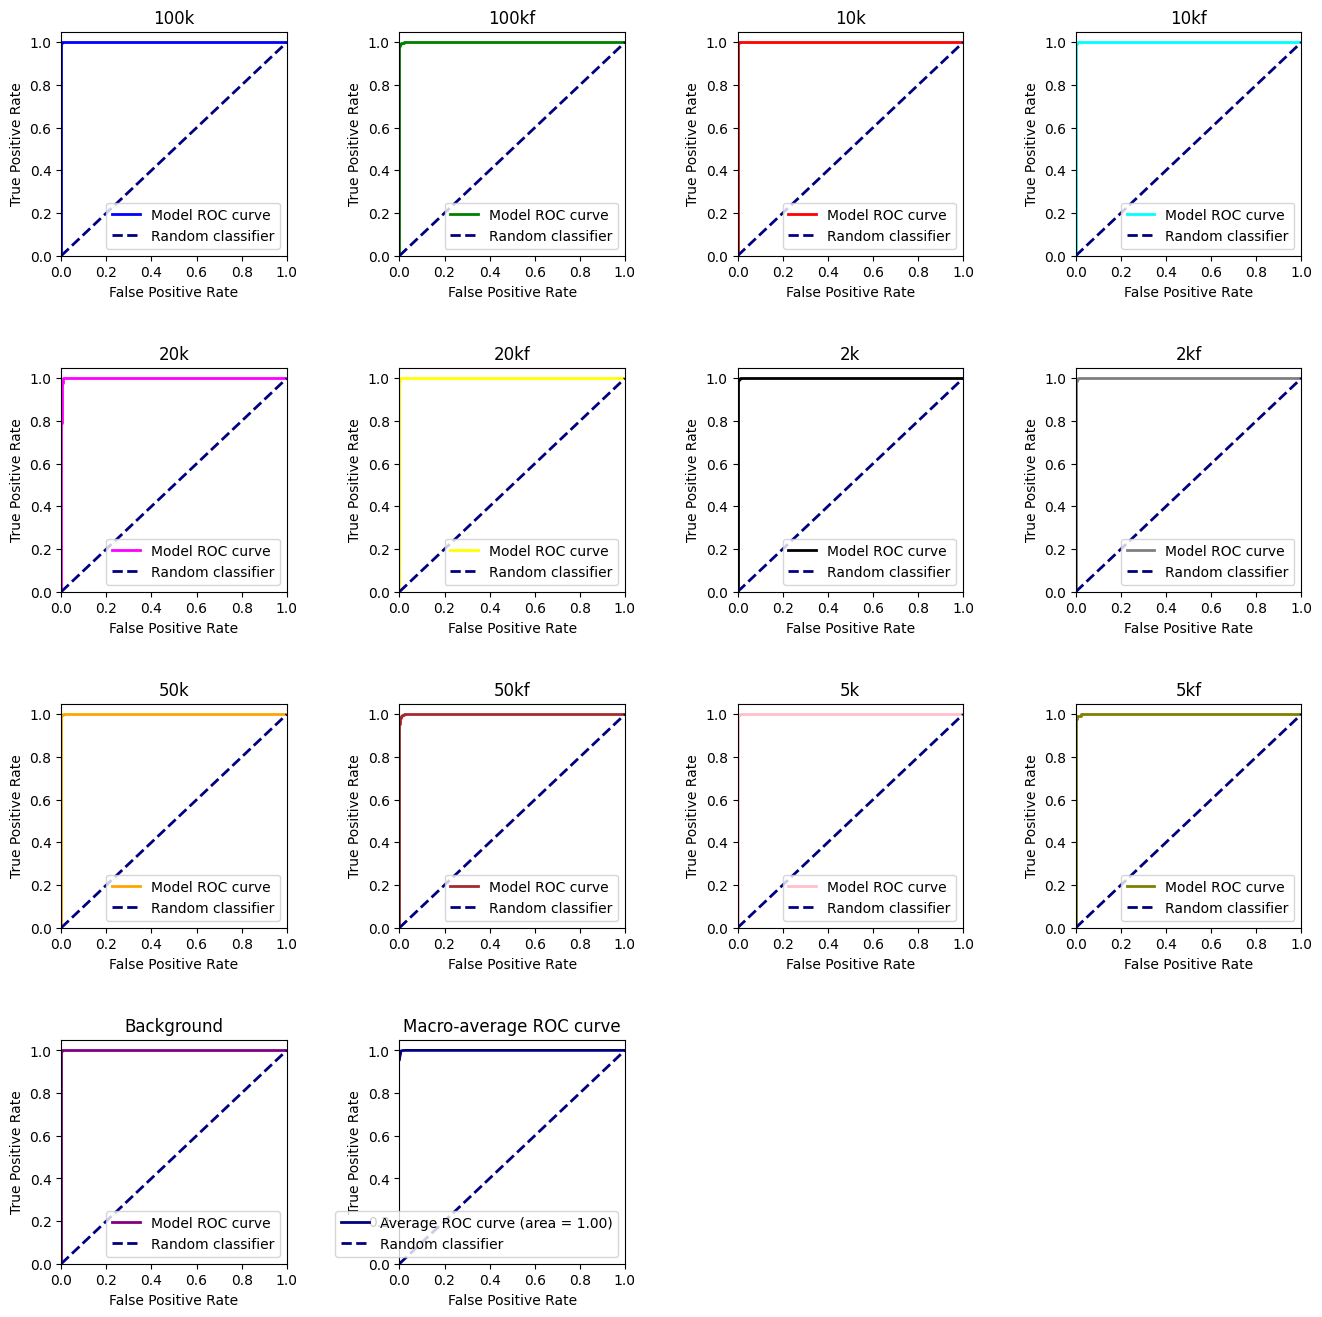

In [7]:
cf.precision_recall_metrics(model, test_ds, class_names)